# <font style="color:rgb(50,120,229)">Data Augmentation</font>
In this notebook, we will discuss about an important trick called **Data Augmentation**. 

Data augmentation is a strategy that enables us to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks. Apart from these modifications, you can also use scaling, color change, noise addition to name a few.

We will use the same dataset and network and use data augmentation while training. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## <font style="color:rgb(50,120,229)">Import the Data</font>
We will use the fashion MNIST load_data function to load it into memory

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## <font style="color:rgb(50,120,229)">Explore the Data</font>
Check out the number of images in training and test data and also the number of classes and some sample images

In [4]:
from tensorflow.keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

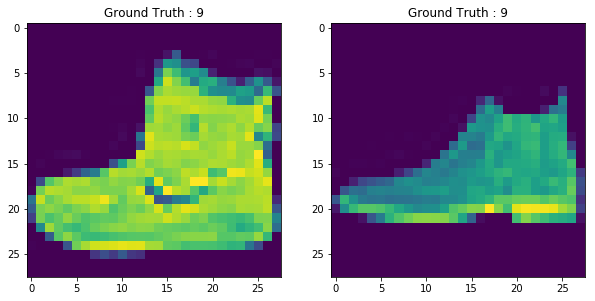

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title("Ground Truth : {}".format(test_labels[0]))


## <font style="color:rgb(50,120,229)">Preprocess the Data</font>
Perform normalization of data and convert the labels to categorical variables to be used in Keras

In [6]:
# Find the shape of input images and create the variable input_shape
nDims = 1
nRows,nCols = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols,nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols,nDims)
input_shape = (nRows, nCols,nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## <font style="color:rgb(50,120,229)">Define the Model</font>
Create the model with conv layer, max pooling layer, dropout layer and Dense layer

In [8]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

## <font style="color:rgb(50,120,229)">Train using Data Augmentation</font>
One of the major reasons for overfitting is that you don’t have enough data to train your network. Apart from regularization, another very effective way to counter Overfitting is Data Augmentation. It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image. It can be a tedious task but fortunately, this can be done in Keras using the **`ImageDataGenerator`** instance

```
from keras.preprocessing.image import ImageDataGenerator
  
ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1.,
    horizontal_flip=True,
    vertical_flip=True)
```
In the above code, we have provided some of the operations that can be done using the ImageDataGenerator for data augmentation. This includes rotation of the image, shifting the image left/right/top/bottom by some amount, flip the image horizontally or vertically, shear or zoom the image etc. 

Here we use the ImageDataGenerator class in Keras to perform Data Augmentation. We perform horizontal and vertical shift of the image and also flipping the image randomly.



In the next few lines, 
- We first create the model and configure it.
- Then we create an `ImageDataGenerator` object and configure it using parameters for horizontal flip, and image translation.
- The `datagen.flow()` function generates batches of data, after performing the data transformations / augmentation specified during the instantiation of the data generator.
- The `fit_generator` function will train the model using the data obtained in batches from the datagen.flow function.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 20
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),                              
                              )

# test_loss,test_accuracy = model2.evaluate(test_data, test_labels_one_hot)

Text(0.5, 1.0, 'Loss Curves')

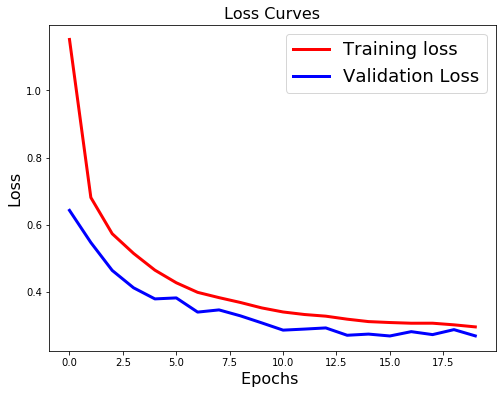

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

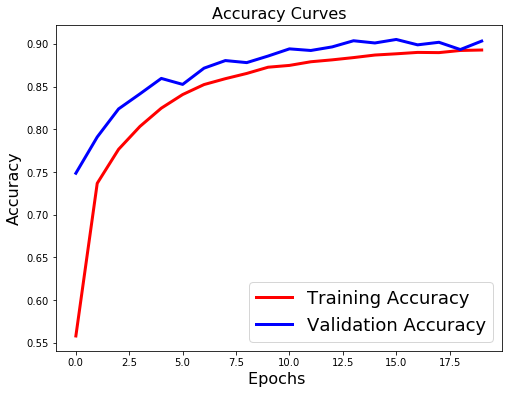

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The test accuracy is greater than training accuracy. This means that the model has generalized very well. This comes from the fact that the model has been trained on much worse data ( for example – flipped images ), so it is finding the normal test data easier to classify.

You should run it for more number of epochs while using data augmentation to get better results.

## <font style="color:rgb(50,120,229)">Exercise </font>
1. Use different levels of data augmentation to see whether you can increase the accuracy of the models